In [2]:
# 确实值的处理:  删除、插补、不处理

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [57]:
# 判断是否有缺失值数据   isnull,notnull
# isnull   缺失值为True,非缺失值为False
# notnull  恰好相反

s = pd.Series([12,3,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,3,45,23,np.nan,np.nan,66,54,np.nan,99,100],
                   'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']   
                  })



print(s.isnull())
print(df.isnull())
print(df['value1'].isnull())
s[s.isnull()] = False
print(s)

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8     True
9    False
dtype: bool
    value1  value2
0    False   False
1    False   False
2    False   False
3    False   False
4     True   False
5     True    True
6    False    True
7    False   False
8     True   False
9    False    True
10   False   False
0     False
1     False
2     False
3     False
4      True
5      True
6     False
7     False
8      True
9     False
10    False
Name: value1, dtype: bool
0       12
1        3
2       45
3       23
4    False
5    False
6       66
7       54
8    False
9       99
dtype: object


In [17]:
# 删除缺失值 -  dropna
s = pd.Series([12,3,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,3,45,23,np.nan,np.nan,66,54,np.nan,99,100],
                   'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']   
                  })

a =s.dropna()
print(a)
print(s)

b= s.dropna(inplace=True)  # inplace   是否在原数据基础上进行修改
print(b)
print(s)
df.dropna()

0    12.0
1     3.0
2    45.0
3    23.0
6    66.0
7    54.0
9    99.0
dtype: float64
0    12.0
1     3.0
2    45.0
3    23.0
4     NaN
5     NaN
6    66.0
7    54.0
8     NaN
9    99.0
dtype: float64
None
0    12.0
1     3.0
2    45.0
3    23.0
6    66.0
7    54.0
9    99.0
dtype: float64


,value1,value2
0,12.0,a
1,3.0,b
2,45.0,c
3,23.0,d
7,54.0,f
10,100.0,g


In [27]:
# 填充-  fillna
s = pd.Series([12,3,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,3,45,23,np.nan,np.nan,66,54,np.nan,99,100],
                   'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']   
                  })

s.fillna
# s.fillna(['value=None', 'method=None', 'axis=None', 'inplace=False', 'limit=None', 'downcast=None', '**kwargs'],)
s.fillna(method='bfill',inplace=True)
# method参数
# pad/ffill    用之前的数据填充
# backfill/bfill 用之后的数据填充

0    12.0
1     3.0
2    45.0
3    23.0
4    66.0
5    66.0
6    66.0
7    54.0
8    99.0
9    99.0
dtype: float64

In [41]:
# 替换缺失数据  - replace
s = pd.Series([12,3,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,3,45,23,np.nan,np.nan,66,54,np.nan,99,100],
                   'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']   
                  })

s.replace([np.nan,12,3],100000,inplace=True)
s

0    100000.0
1    100000.0
2        45.0
3        23.0
4    100000.0
5    100000.0
6        66.0
7        54.0
8    100000.0
9        99.0
dtype: float64

缺失值数据量 3
确实数据比30.00%


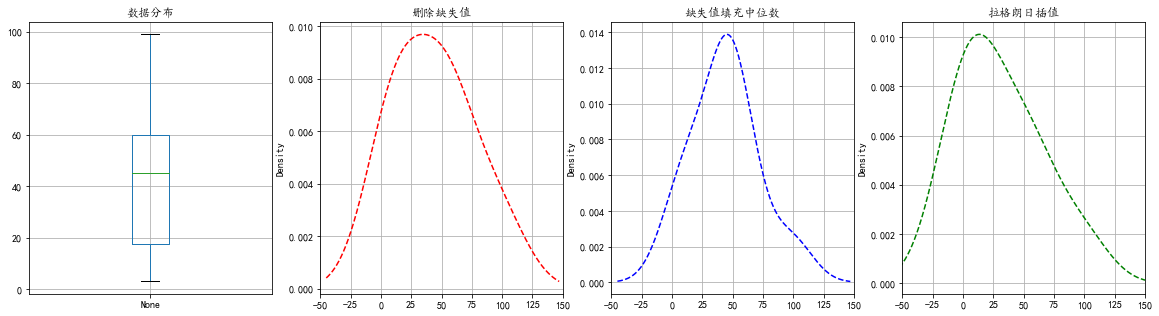

In [56]:
# 缺失值插补
# 均值、中位数、众数、临近值插补、差值法
data = pd.Series([12,3,45,23,np.nan,np.nan,66,54,np.nan,99])
data.mean()# 均值
data.median()# 中位数
data.mode()# 众数

data_na = data[data.isnull()]
print('缺失值数据量', len(data_na))
print("确实数据比%.2f%%"%(len(data_na)/len(data)*100))


data_c = data.fillna(data.median())# 填充中位数
fig,axes = plt.subplots(1,4,figsize=(20,5))
data.plot.box(ax=axes[0],grid=True,title='数据分布')
data.plot(kind='kde',style='--r',ax=axes[1],grid=True,title='删除缺失值',xlim=[-50,150])
data_c.plot(kind='kde',style='--b',ax=axes[2],grid=True,title='缺失值填充中位数',xlim=[-50,150])
# 密度图查看确实情况


from scipy.interpolate import lagrange
def f(s,n,k=5):
    y = s[list(range(n-k,n+i+k))]
    y = y[y.notnull()]
    return  (lagrange(y.index,list(y))(n))
    
    
for i in range(len(data)):
    if data.isnull()[i]:
        data[i] = f(data,i)
data.dropna(inplace=True)
    
data.plot(kind='kde',style='--g',ax=axes[3],grid=True,title='拉格朗日插值',xlim=[-50,150])

         2
-0.1111 x + 0.3333 x + 10


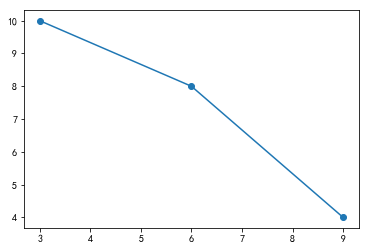

In [47]:
# 拉格朗日插值法
from scipy.interpolate import lagrange
x = [3,6,9]
y = [10,8,4]
plt.scatter(x,y)
print(lagrange(x,y))
# y = -0.1111 x*x + 0.3333 x + 10
plt.plot(x,y)


In [59]:
data = pd.Series([12,3,45,23,np.nan,np.nan,66,54,np.nan,99])
data =  data.replace(data[data.isnull()],0)
data

0    12.0
1     3.0
2    45.0
3    23.0
4     0.0
5     0.0
6    66.0
7    54.0
8     0.0
9    99.0
dtype: float64